In [16]:
import analysis_functions as af
import json 
import pandas as pd 
import matplotlib.pyplot as plt
import analysis_functions as af
import numpy as np
from re_train_nested_cv import retrain

# Load results

In [17]:
results_gie = pd.read_json('json_results/result_gie.json')
results_gie_dict = json.load(open('json_results/result_gie.json'))
tables = list(results_gie_dict.keys())
print(tables)
feat_sel_algo_list = ['RF', 'ADABOOST', 'ANOVA_PERC', 'ANOVA_K_BEST', 'CHI2_PERC', 'CHI2_K_BEST', 'MI_PERC', 'MI_K_BEST', 'NO_SEL', 'RDM_SEL', 'LASSO']
pred_algo_list = ['DT', 'RF', 'ADABOOST', 'PSVM', 'KNN', 'LOGREG', 'LOGREGRIDGE', 'BAGG', 'MLP', 'LDA', 'QDA', 'NaiveB'] 
MAX_FEATURES = 3
outcomes_list = ['Récidive Locale', 'Décès']
metric_list = ['roc_auc', 'sensitivity', 'specificity']


['gie_1month_gtv.csv', 'simu_gie_gtv.csv', 'simu_onemth_gtv.csv']


In [18]:
y_val = pd.read_csv('y_tables/y_val_gie.csv', index_col=0)
y_val

,Récidive Locale,Décès
Patient 84,0,0
Patient 75,1,0
Patient 66,0,0
Patient 72,1,1
Patient 52,0,0
Patient 55,0,0
Patient 74,0,0
Patient 50,0,1
Patient 67,0,0


In [19]:
y_train = pd.read_csv('y_tables/y_train_gie.csv', index_col=0)
y_train

,Récidive Locale,Décès
Patient 82,0,0
Patient 48,1,1
Patient 56,0,0
Patient 73,0,0
Patient 68,0,0
Patient 58,0,1
Patient 85,0,0
Patient 81,0,1
Patient 54,1,1
Patient 71,0,0


In [20]:
y_val["Récidive Locale"].value_counts()

Récidive Locale
0    7
1    2
Name: count, dtype: int64

In [7]:
y_val["Décès"].value_counts()

Décès
0    7
1    2
Name: count, dtype: int64

# First results 
## Data distribution

In [22]:
# plot y_train and y_val histograms, labelling in one color patients with 1 Recidive Locale and another color for 0 Recidive Locale 
y_val_pos = y_val['Récidive Locale'].loc[y_val['Récidive Locale']==1]
y_val_neg = y_val['Récidive Locale'].loc[y_val['Récidive Locale']==0]

y_train_pos = y_train['Récidive Locale'].loc[y_train['Récidive Locale']==1]
y_train_neg = y_train['Récidive Locale'].loc[y_train['Récidive Locale']==0]

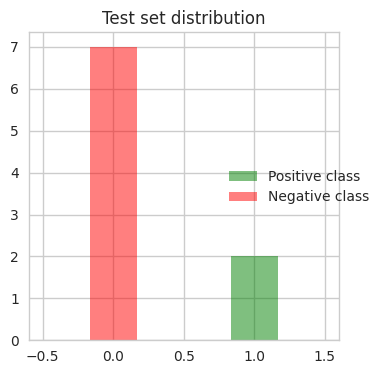

In [45]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.hist(y_val_pos, bins=3, alpha=0.5, label='Positive class', color='green')
ax.hist(y_val_neg, bins=3, alpha=0.5, label='Negative class', color='red')
ax.set_title('Test set distribution')
fig.legend(loc='right')

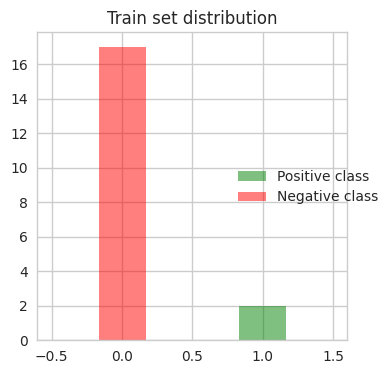

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.hist(y_train_pos, bins=3, alpha=0.5, label='Positive class', color='green')
ax.hist(y_train_neg, bins=3, alpha=0.5, label='Negative class', color='red')
ax.set_title('Train set distribution')
fig.legend(loc='right')

## Heatmaps
### Récidive Locale

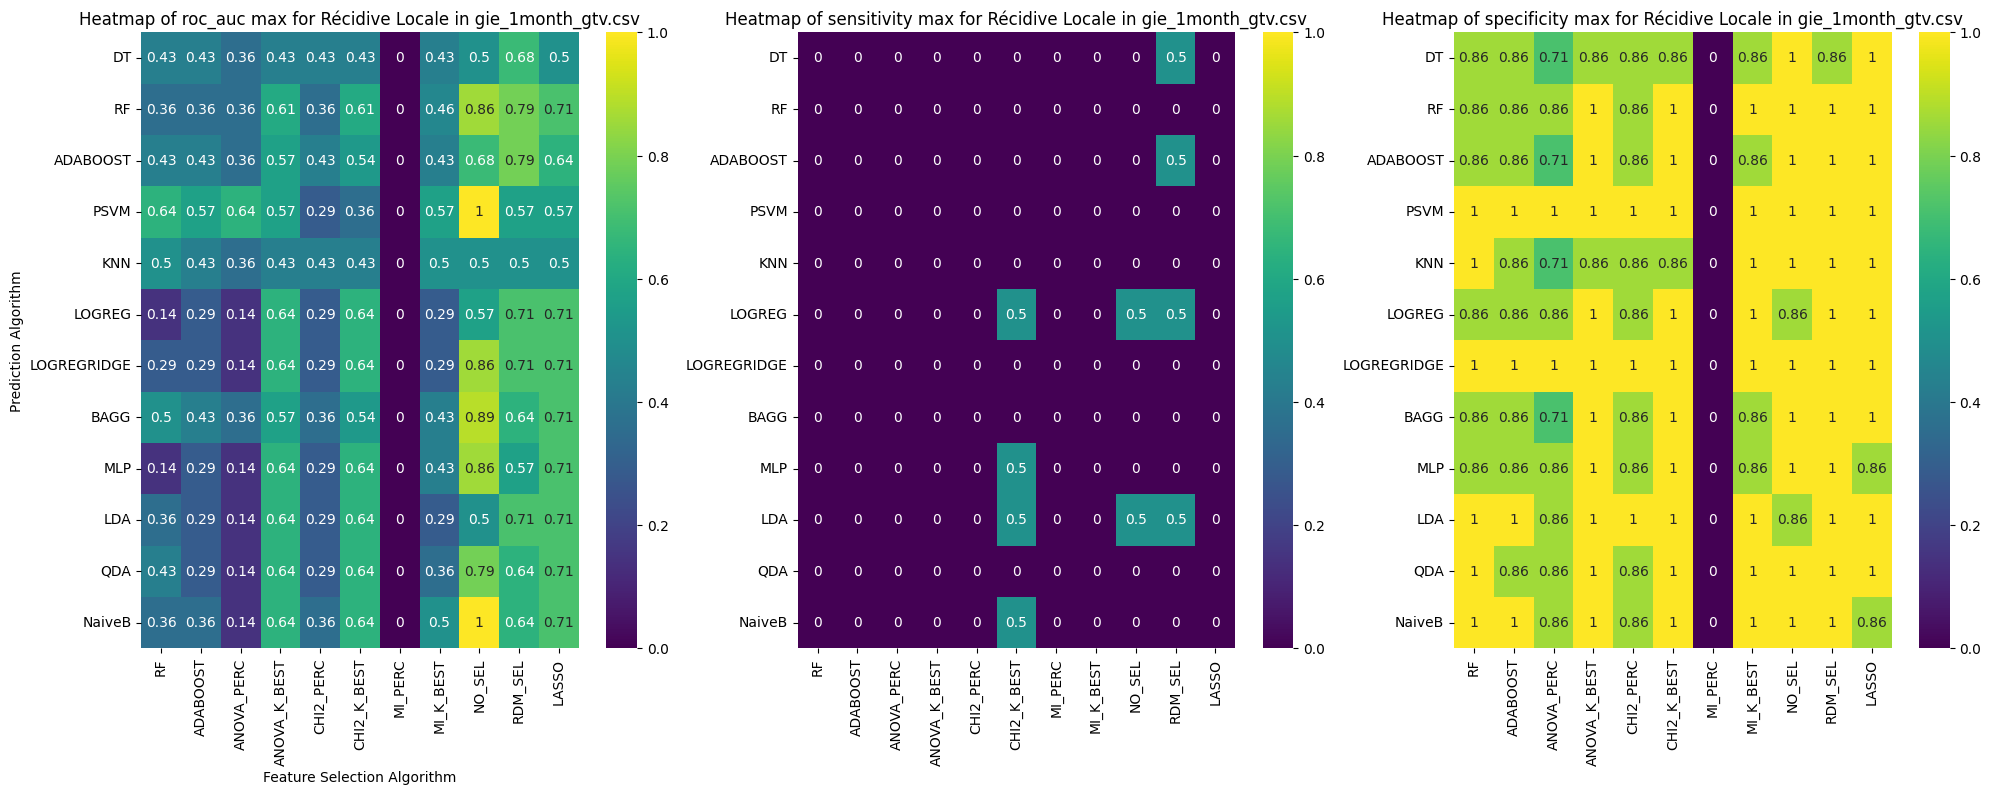

In [8]:
af.plot_heatmap(results_gie, tables[0], outcomes_list[0], feat_sel_algo_list, pred_algo_list, value='max')

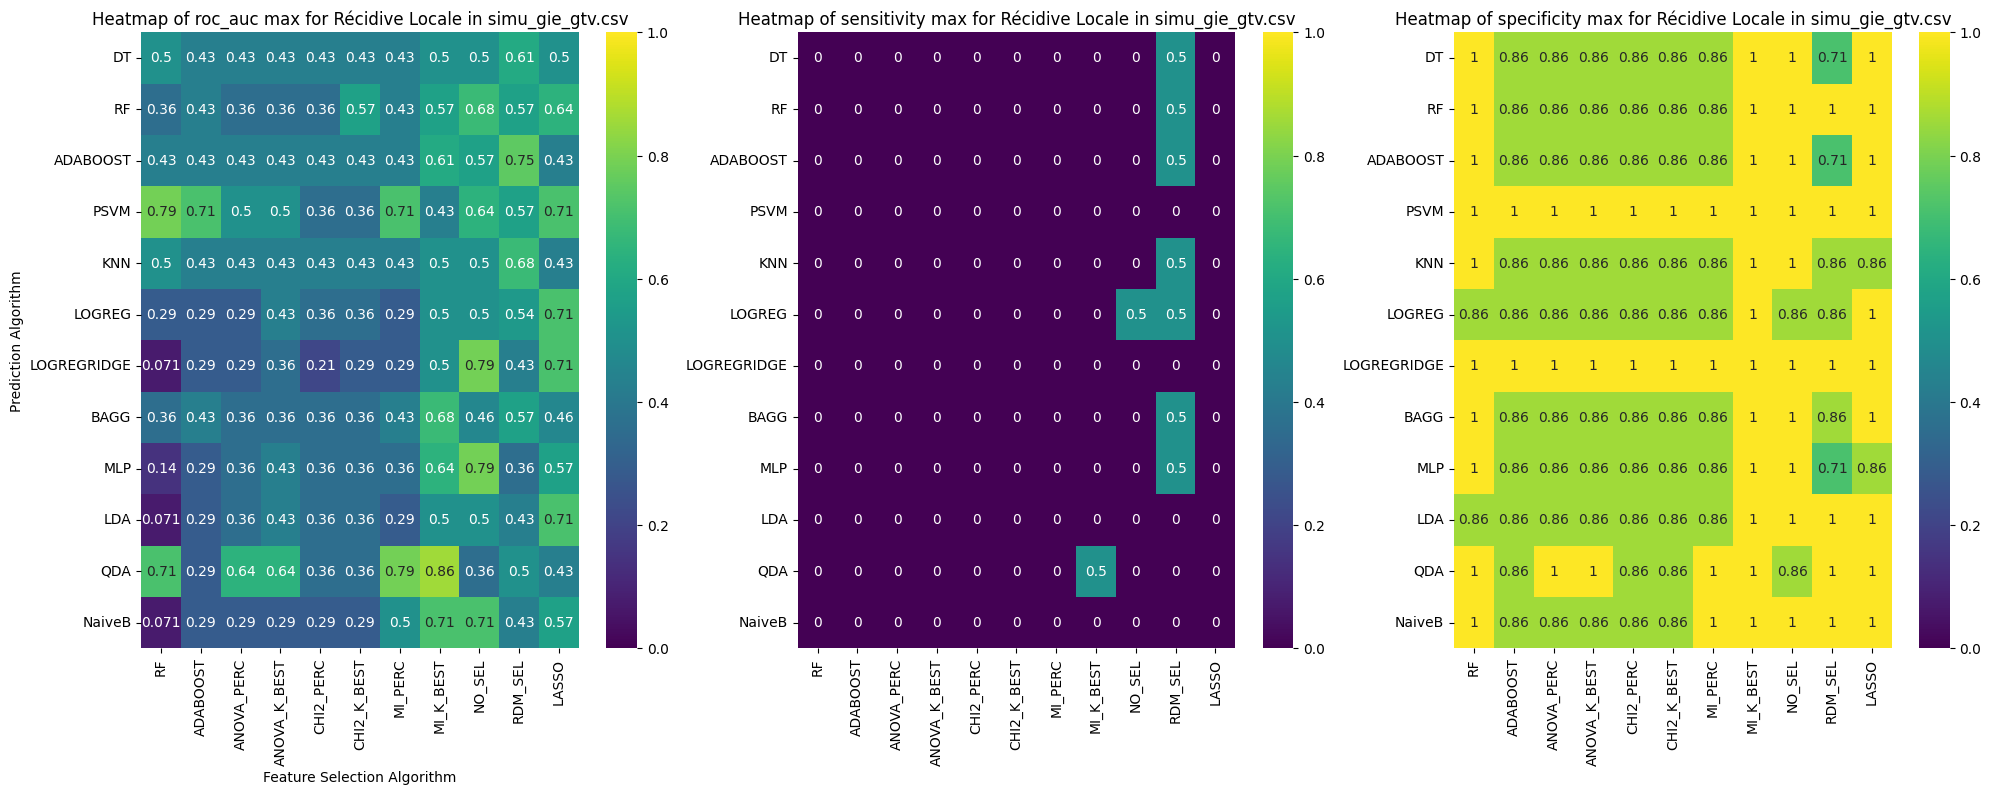

In [9]:
af.plot_heatmap(results_gie, tables[1], outcomes_list[0], feat_sel_algo_list, pred_algo_list, value='max')

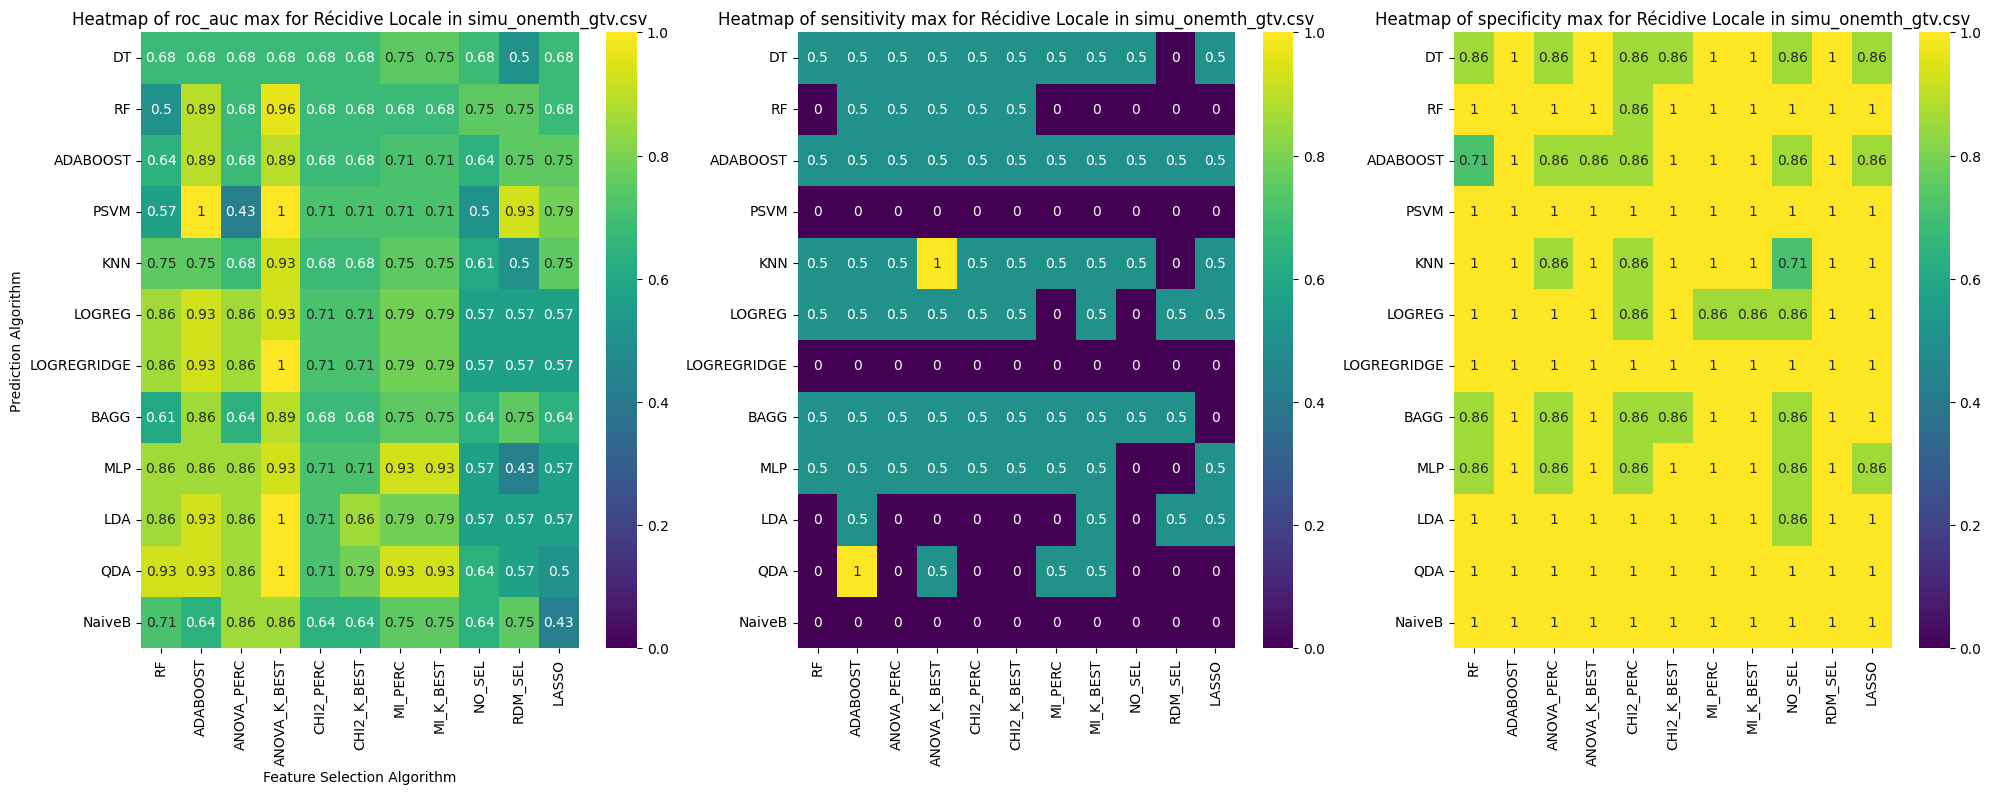

In [10]:
af.plot_heatmap(results_gie, tables[2], outcomes_list[0], feat_sel_algo_list, pred_algo_list, value='max')

For ROC AUC and specificity, results seem the best with delta-radiomics (last table).
Sensitivity takes only three values (0, 0.5 and 1) because there is only 2 positive patients (out of 9).

### Décès

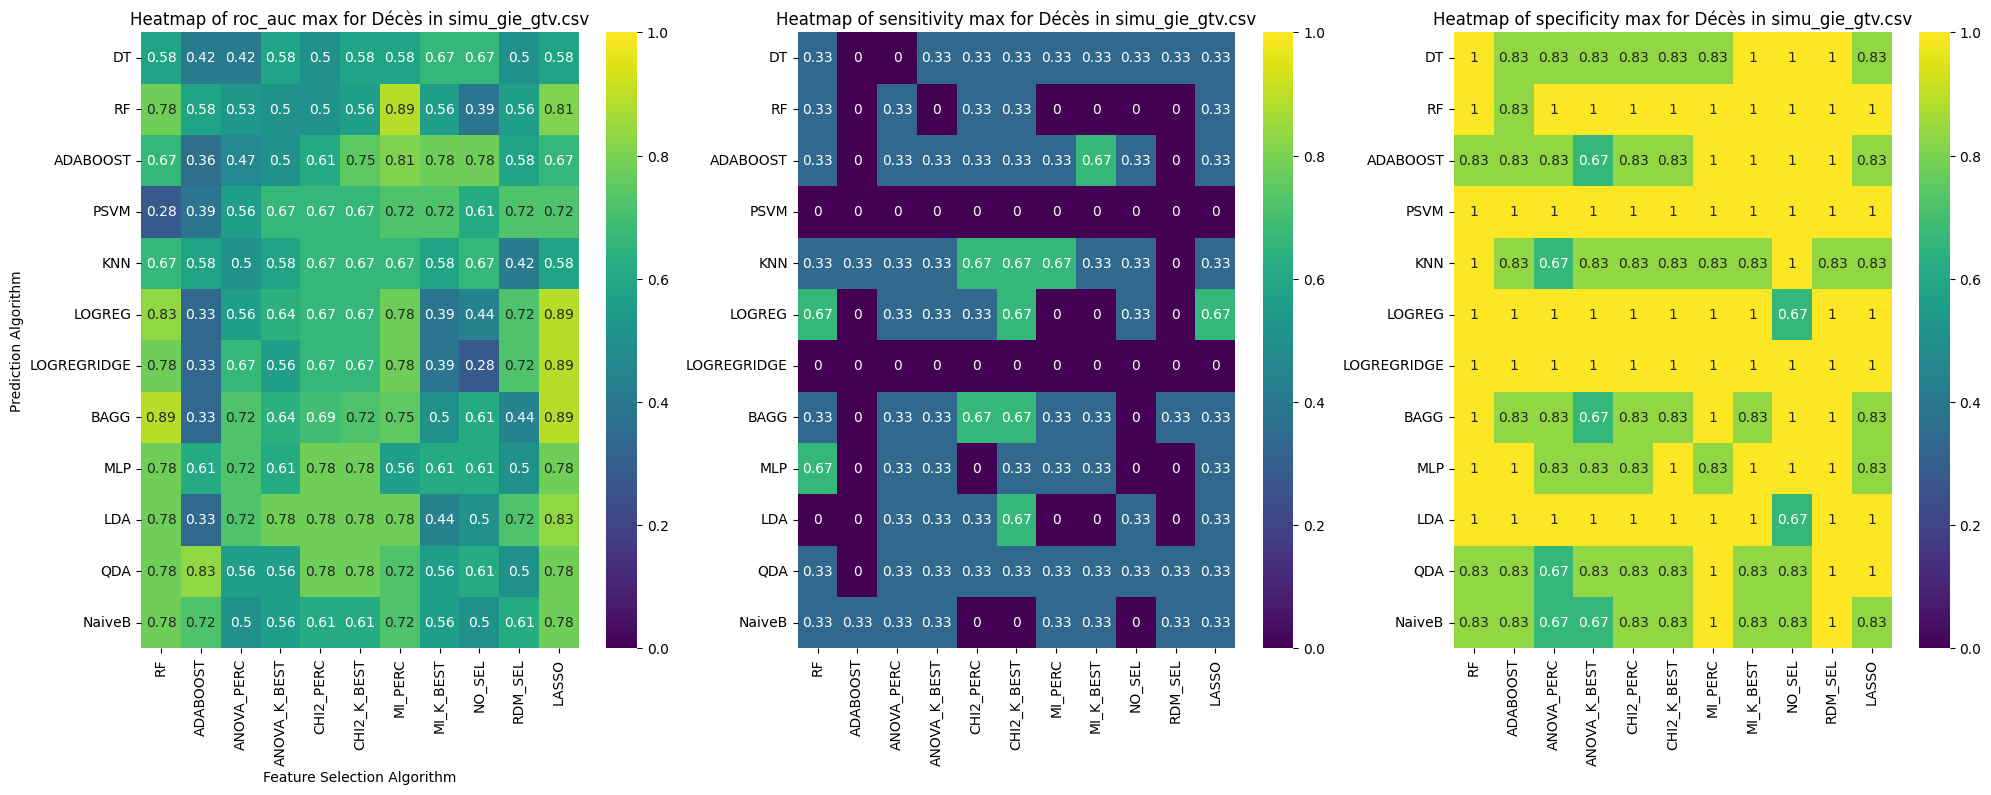

In [11]:
af.plot_heatmap(results_gie, tables[1], outcomes_list[1], feat_sel_algo_list, pred_algo_list, value='max')

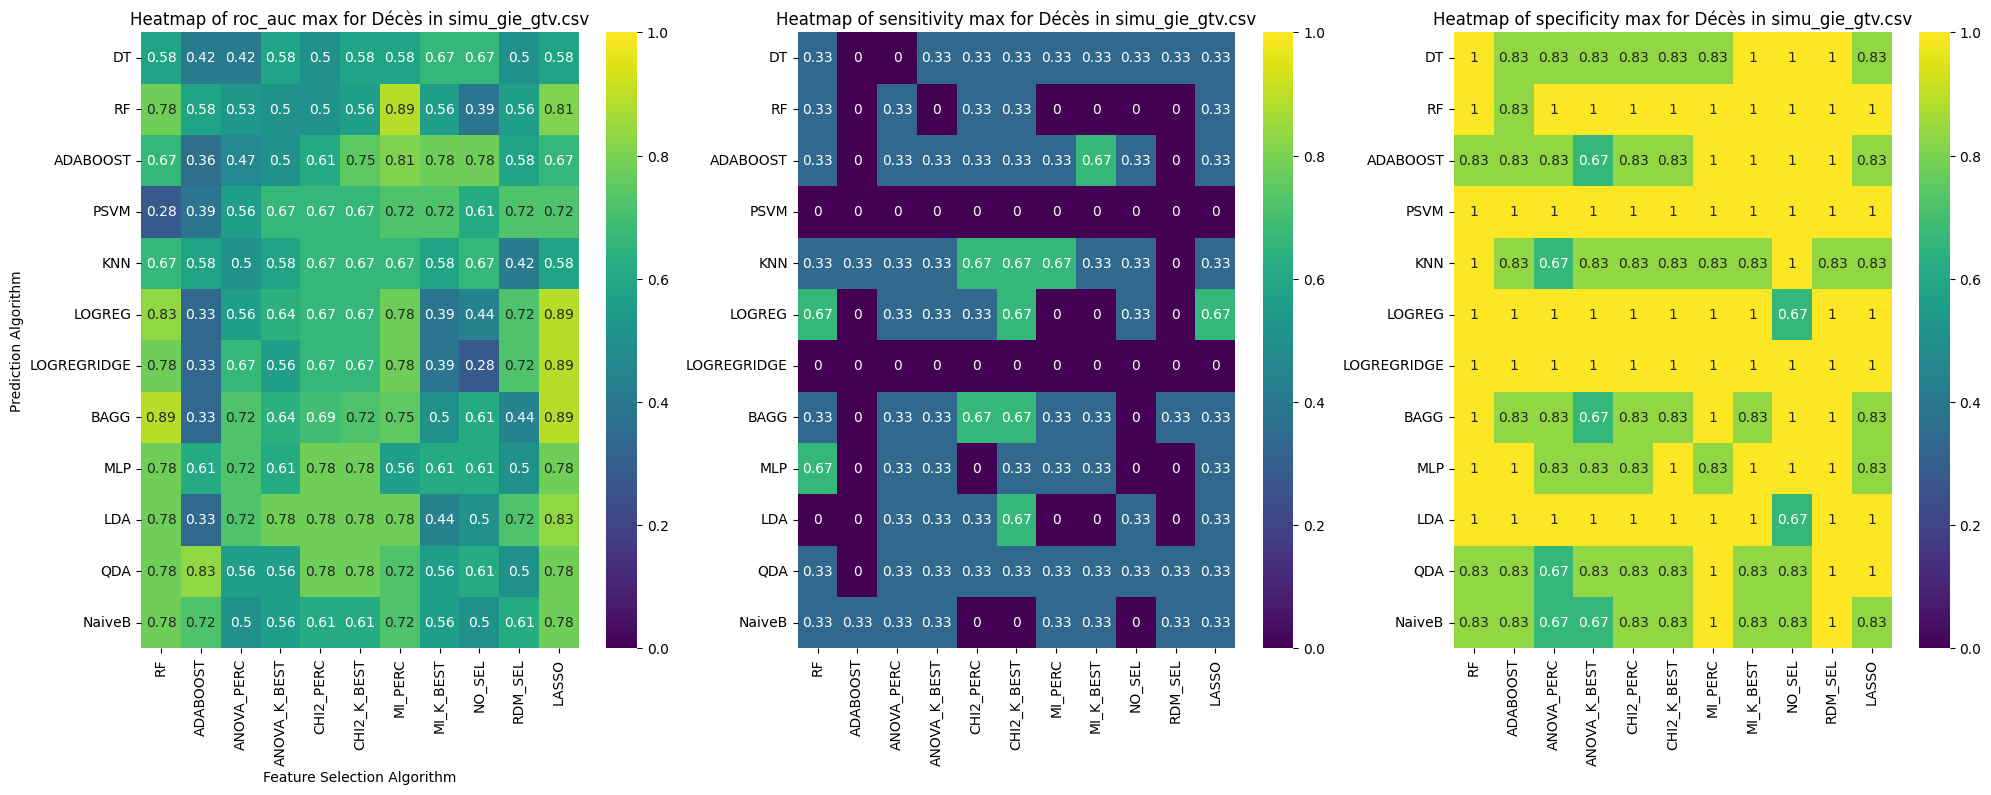

In [12]:
af.plot_heatmap(results_gie, tables[1], outcomes_list[1], feat_sel_algo_list, pred_algo_list, value='max')

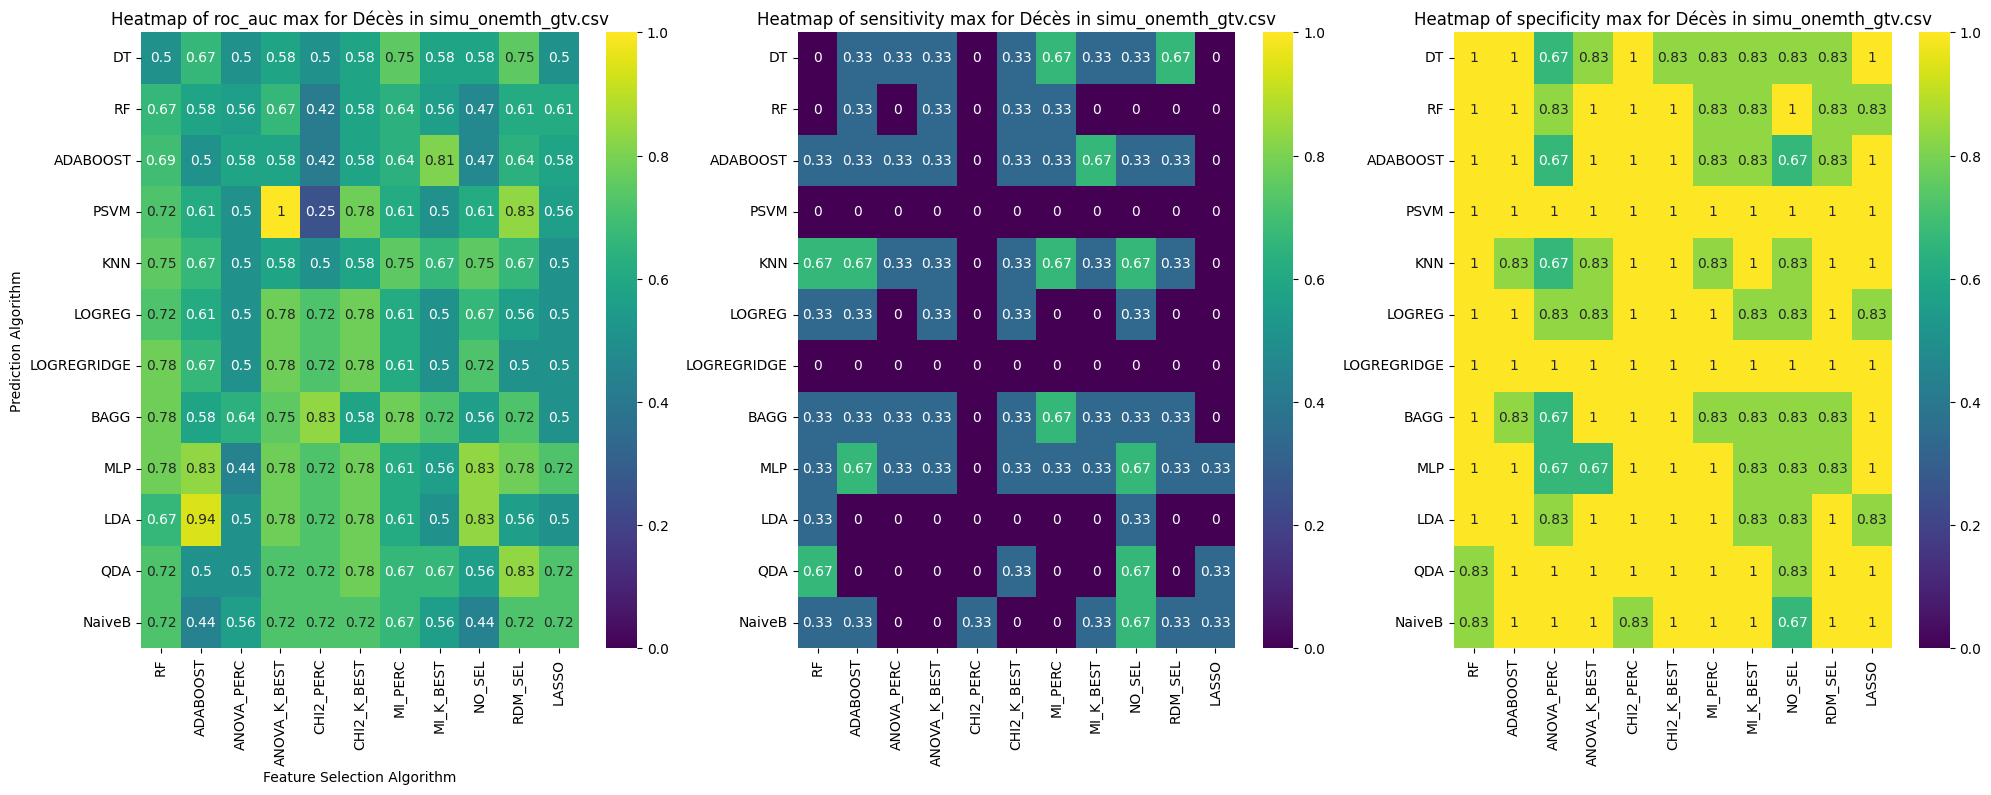

In [13]:
af.plot_heatmap(results_gie, tables[2], outcomes_list[1], feat_sel_algo_list, pred_algo_list, value='max')

Best AUC results does not seem to have good sensibility here. 
In general models achieve good specificity. Need further analysis. 

## Boxplot comparison

In [14]:
rec_loc_top_res = af.get_best_results_dict(results_gie, tables, feat_sel_algo_list, pred_algo_list, metric_list, 'Récidive Locale')
deces_top_res = af.get_best_results_dict(results_gie, tables, feat_sel_algo_list, pred_algo_list, metric_list, 'Décès')

In [15]:
print(tables)

['gie_1month_gtv.csv', 'simu_gie_gtv.csv', 'simu_onemth_gtv.csv']


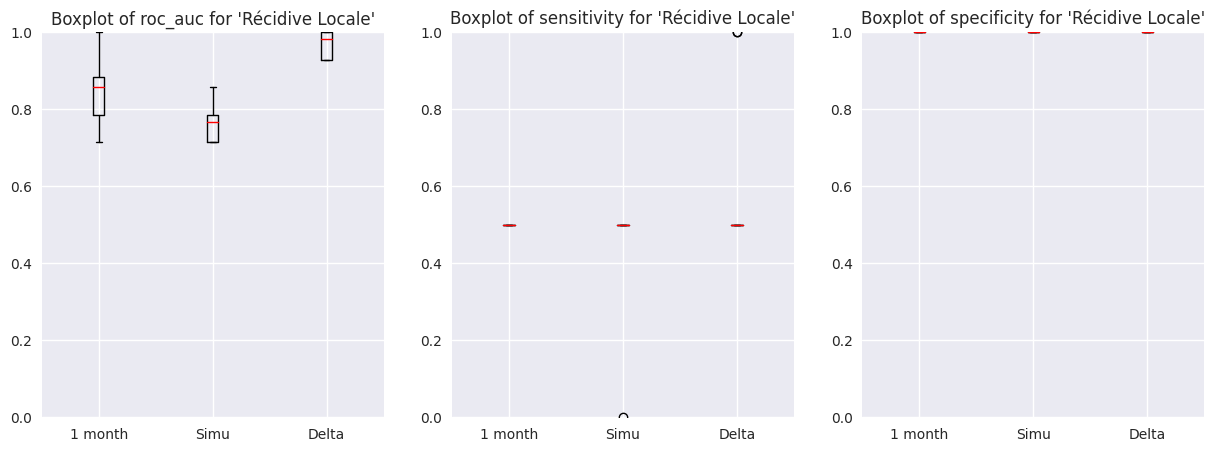

In [16]:
plt.style.use('seaborn-v0_8')
widths = 0.1
medianprops = dict(linestyle='-', linewidth=1, color='red')
nice_tables = ['1 month', 'Simu', 'Delta']
plt.figure(figsize=(15, 5))
i = 1
for metric in metric_list: 
    value_by_table = rec_loc_top_res[metric]
    plt.subplot(1, 3, i), plt.boxplot(value_by_table.values(), widths=widths, medianprops=medianprops), plt.title(f"Boxplot of {metric} for 'Récidive Locale'"), plt.xticks(range(1, len(tables) + 1), nice_tables), plt.ylim([0, 1])
    i += 1

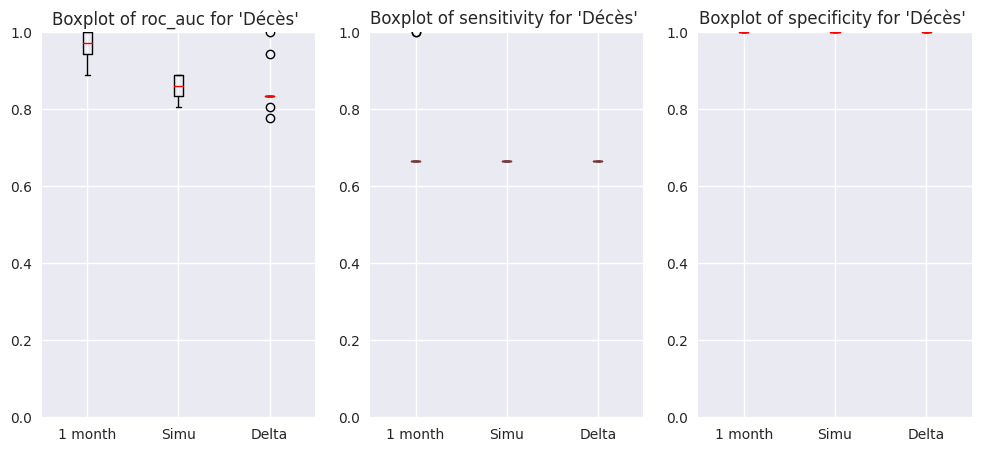

In [17]:
plt.style.use('seaborn-v0_8')
widths = 0.1
medianprops = dict(linestyle='-', linewidth=1, color='red')
nice_tables = ['1 month', 'Simu', 'Delta']
plt.figure(figsize=(12, 5))
i = 1
for metric in metric_list: 
    value_by_table = deces_top_res[metric]
    plt.subplot(1, 3, i), plt.boxplot(value_by_table.values(), widths=widths, medianprops=medianprops), plt.title(f"Boxplot of {metric} for 'Décès' "), plt.xticks(range(1, len(tables) + 1), nice_tables), plt.ylim([0, 1])
    i += 1

## 5 best algorithms (AUC)
### Récidive Locale

In [18]:
af.get_best_results(results_gie, tables, feat_sel_algo_list, pred_algo_list, 'Récidive Locale', metric='roc_auc', k = 5)

Top 5 results for each table and Récidive Locale in terms of roc_auc:


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U4'), dtype('<U4')) -> None

### Décès

In [ ]:
af.get_best_results(results_gie, tables, feat_sel_algo_list, pred_algo_list, 'Décès', metric='roc_auc', k = 5)

Top 3 results for each table and Décès in terms of roc_auc:
Top 5 results for table gie_1month_gtv.csv:
roc_auc: 1.0, Prediction Algorithm: MLP, Feature Selection Algorithm: ADABOOST, Number of Features: 3
roc_auc: 1.0, Prediction Algorithm: MLP, Feature Selection Algorithm: ANOVA_PERC, Number of Features: 3
roc_auc: 1.0, Prediction Algorithm: MLP, Feature Selection Algorithm: CHI2_K_BEST, Number of Features: 3
roc_auc: 1.0, Prediction Algorithm: MLP, Feature Selection Algorithm: LASSO, Number of Features: 3
roc_auc: 0.9722222222222221, Prediction Algorithm: BAGG, Feature Selection Algorithm: ANOVA_PERC, Number of Features: 3


Top 5 results for table simu_gie_gtv.csv:
roc_auc: 0.8888888888888891, Prediction Algorithm: BAGG, Feature Selection Algorithm: RF, Number of Features: 3
roc_auc: 0.8888888888888891, Prediction Algorithm: LOGREG, Feature Selection Algorithm: LASSO, Number of Features: 3
roc_auc: 0.8888888888888891, Prediction Algorithm: LOGREGRIDGE, Feature Selection Algorithm: 

{'gie_1month_gtv.csv': {'Décès': [(1.0, 'MLP', 'ADABOOST', 3),
   (1.0, 'MLP', 'ANOVA_PERC', 3),
   (1.0, 'MLP', 'CHI2_K_BEST', 3),
   (1.0, 'MLP', 'LASSO', 3),
   (0.9722222222222221, 'BAGG', 'ANOVA_PERC', 3)]},
 'simu_gie_gtv.csv': {'Décès': [(0.8888888888888891, 'BAGG', 'RF', 3),
   (0.8888888888888891, 'LOGREG', 'LASSO', 3),
   (0.8888888888888891, 'LOGREGRIDGE', 'LASSO', 3),
   (0.8888888888888891, 'BAGG', 'LASSO', 3),
   (0.8888888888888881, 'RF', 'MI_PERC', 3)]},
 'simu_onemth_gtv.csv': {'Décès': [(1.0, 'PSVM', 'ANOVA_K_BEST', 3),
   (0.9444444444444441, 'LDA', 'ADABOOST', 3),
   (0.833333333333333, 'MLP', 'ADABOOST', 3),
   (0.833333333333333, 'BAGG', 'CHI2_PERC', 3),
   (0.833333333333333, 'MLP', 'NO_SEL', 1)]}}

## Best (spe&sens)
### Récidive Locale

In [ ]:
af.find_perf_alg(results_gie, tables, ['Récidive Locale'], feat_sel_algo_list, pred_algo_list, threshold=0.7)

Table: simu_onemth_gtv.csv, Outcome: Récidive Locale, Feature Selection Algorithm: ADABOOST, Prediction Algorithm: QDA, Number of Features: 3, '
'                                       AUC: 0.928571428571428, Sensitivity: 1.0, Specificity: 0.8571428571428571, '
'                                       Features: ['original_shape_Elongation', 'original_glcm_Imc1', 'original_firstorder_10Percentile']
Table: simu_onemth_gtv.csv, Outcome: Récidive Locale, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: KNN, Number of Features: 2, '
'                                       AUC: 0.928571428571428, Sensitivity: 1.0, Specificity: 0.8571428571428571, '
'                                       Features: ['original_shape_Elongation', 'original_firstorder_10Percentile']


### Décès

In [ ]:
af.find_perf_alg(results_gie, tables, ['Décès'], feat_sel_algo_list, pred_algo_list, threshold=0.7)

Table: gie_1month_gtv.csv, Outcome: Décès, Feature Selection Algorithm: CHI2_K_BEST, Prediction Algorithm: MLP, Number of Features: 3, '
'                                       AUC: 1.0, Sensitivity: 1.0, Specificity: 1.0, '
'                                       Features: ['original_shape_Maximum2DDiameterSlice', 'original_firstorder_Energy', 'original_glszm_SizeZoneNonUniformity']


# Nested CV

In [2]:
folder_path = '/home/tachennf/Documents/delta-rad/extracted_radiomics/'
delta_rad_tables = ['simu_gie_gtv.csv', 'rd_simu_onemth_gtv.csv', 'gie_1month_gtv.csv'] # ['rd_f1_f5_gtv.csv'] # 'f3_gtv.csv', 'simu_gtv.csv', 'f1_gtv.csv', 'f5_gtv.csv', 'rd_simu_f1_gtv.csv', 'rd_simu_f3_gtv.csv', 'rd_simu_f5_gtv.csv', 'rd_f1_f3_gtv.csv', 
feat_sel_algo_list = ['ANOVA_PERC', 'RDM_SEL', 'NO_SEL', 'RF']  # # , 'ADABOOST', , 'MI_PERC', 'MI_K_BEST', 'NO_SEL', 'RDM_SEL', 'LASSO'
outcome_csv = 'outcomes.csv'
smote = False
results_file = 'json_results/results_ncv_simu_gie.json'
pred_algo_list = ['RF', 'ADABOOST', 'LOGREGRIDGE', 'PSVM', 'KNN',  'BAGG', 'MLP', 'QDA'] # 
MAX_FEATURES = 3
outcomes_list = ['Récidive Locale'] # 'Récidive Méta', 

In [3]:
results_dict = json.load(open(results_file))

print(list(results_dict.keys()))
metric_list = ['roc_auc', 'sensitivity', 'specificity']
results = pd.read_json(results_file)

['simu_gie_gtv.csv', 'rd_simu_onemth_gtv.csv', 'gie_1month_gtv.csv']


## Best AUCs 

In [5]:
top_results = af.get_best_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, 'Récidive Locale', metric='test_auc', k = 3)

Top 3 results for each table and Récidive Locale in terms of test_auc:
Top 3 mean results for table simu_gie_gtv.csv:
Mean test_auc: 0.85, Prediction Algorithm: BAGG, Feature Selection Algorithm: RDM_SEL, Features: ['original_shape_Sphericity', 'original_shape_Flatness']
Mean test_auc: 0.8083333333333332, Prediction Algorithm: KNN, Feature Selection Algorithm: RDM_SEL, Features: ['original_shape_Sphericity', 'original_shape_Flatness']
Mean test_auc: 0.8, Prediction Algorithm: PSVM, Feature Selection Algorithm: RDM_SEL, Features: ['original_shape_Sphericity']


Top 3 mean results for table rd_simu_onemth_gtv.csv:
Mean test_auc: 0.8, Prediction Algorithm: KNN, Feature Selection Algorithm: ANOVA_PERC, Features: ['original_glszm_LowGrayLevelZoneEmphasis']
Mean test_auc: 0.775, Prediction Algorithm: LOGREGRIDGE, Feature Selection Algorithm: ANOVA_PERC, Features: ['original_glszm_LowGrayLevelZoneEmphasis']
Mean test_auc: 0.775, Prediction Algorithm: ADABOOST, Feature Selection Algorithm: RF,

In [7]:
af.find_perf_alg2(results, delta_rad_tables, ['Récidive Locale'], feat_sel_algo_list, pred_algo_list, threshold=0.79, metric='test_auc')

Table: simu_gie_gtv.csv, Outcome: Récidive Locale, Feature Selection Algorithm: RDM_SEL, Prediction Algorithm: PSVM, Number of Features: 1, '
'                                           TEST AUC: 0.8, Sensitivity: 0.7, Specificity: 0.8333333333333333, '
'                                           Features: ['original_shape_Sphericity']
Table: simu_gie_gtv.csv, Outcome: Récidive Locale, Feature Selection Algorithm: RDM_SEL, Prediction Algorithm: KNN, Number of Features: 2, '
'                                           TEST AUC: 0.8083333333333332, Sensitivity: 0.7, Specificity: 0.7833333333333332, '
'                                           Features: ['original_shape_Sphericity', 'original_shape_Flatness']
Table: simu_gie_gtv.csv, Outcome: Récidive Locale, Feature Selection Algorithm: RDM_SEL, Prediction Algorithm: BAGG, Number of Features: 2, '
'                                           TEST AUC: 0.85, Sensitivity: 0.6, Specificity: 0.8333333333333333, '
'                           

## AUC Boxplot

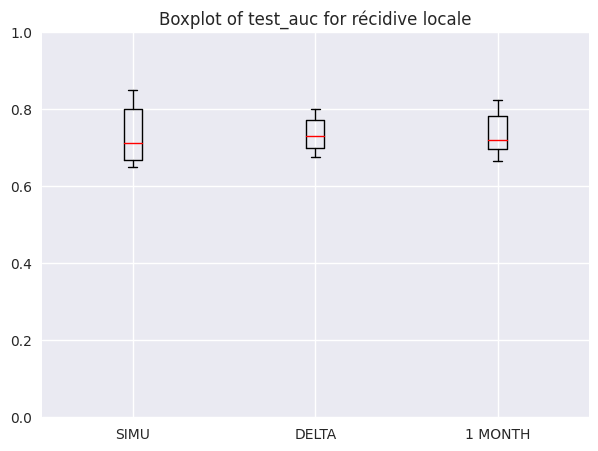

In [8]:
metric_list = ['test_auc']
rec_loc_top_res = af.get_best_results_dict2(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, metric_list, 'Récidive Locale', k=10)
plt.style.use('seaborn-v0_8')
widths = 0.1
medianprops = dict(linestyle='-', linewidth=1, color='red')
nice_tables = ['SIMU', 'DELTA', '1 MONTH']

plt.figure(figsize=(24, 5))
i = 1
for metric in metric_list: 
    value_by_table = rec_loc_top_res[metric]
    plt.subplot(1, 3, i), plt.boxplot(value_by_table.values(), widths=widths, medianprops=medianprops), plt.title(f'Boxplot of {metric} for récidive locale'), plt.ylim([0, 1]), plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables), 
    i += 1

## AUC Scatter plot

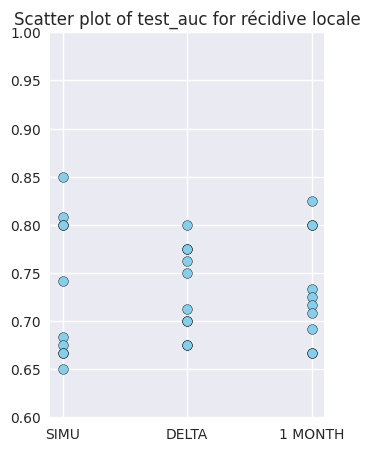

In [9]:
plt.figure(figsize=(12, 5))
i = 1
for metric in metric_list: 
    value_by_table = rec_loc_top_res[metric]
    plt.subplot(1, 3, i)
    for j, table in enumerate(delta_rad_tables):
        data = value_by_table[table]
        x_values = np.full(len(data), j)  # Set x-values for this table (all points at x=j) 
        plt.scatter(x_values, data, color='skyblue', edgecolor='black')
    plt.title(f'Scatter plot of {metric} for récidive locale')
    plt.xticks(range(len(delta_rad_tables)), nice_tables)
    plt.ylim([0.6, 1])
    i += 1

## Spe and sen

In [10]:
af.find_perf_alg2(results, delta_rad_tables, ['Récidive Locale'], feat_sel_algo_list, pred_algo_list, threshold=0.6, metric='sens_spec')

Table: simu_gie_gtv.csv, Outcome: Récidive Locale, Feature Selection Algorithm: RDM_SEL, Prediction Algorithm: PSVM, Number of Features: 1, '
'                                           TEST AUC: 0.8, Sensitivity: 0.7, Specificity: 0.8333333333333333, '
'                                           Features: ['original_shape_Sphericity']
Table: simu_gie_gtv.csv, Outcome: Récidive Locale, Feature Selection Algorithm: RDM_SEL, Prediction Algorithm: KNN, Number of Features: 2, '
'                                           TEST AUC: 0.8083333333333332, Sensitivity: 0.7, Specificity: 0.7833333333333332, '
'                                           Features: ['original_shape_Sphericity', 'original_shape_Flatness']
Table: gie_1month_gtv.csv, Outcome: Récidive Locale, Feature Selection Algorithm: NO_SEL, Prediction Algorithm: KNN, Number of Features: 3, '
'                                           TEST AUC: 0.6916666666666667, Sensitivity: 0.7, Specificity: 0.6833333333333332, '
'             

## ROC curves

In [ ]:
print(top_results)

{'simu_gie_gtv.csv': {'Récidive Locale': [(0.85, 'BAGG', 'RDM_SEL', ['original_shape_Sphericity', 'original_shape_Flatness'], {'BAGG__n_estimators': 75}), (0.8083333333333332, 'KNN', 'RDM_SEL', ['original_shape_Sphericity', 'original_shape_Flatness'], {'KNN__n_neighbors': 2}), (0.8, 'PSVM', 'RDM_SEL', ['original_shape_Sphericity'], {'PSVM__C': 0.01, 'PSVM__degree': 3}), (0.7999999999999998, 'ADABOOST', 'RF', ['original_glcm_Imc2', 'original_glszm_ZoneEntropy'], {'ADABOOST__n_estimators': 25}), (0.7416666666666666, 'ADABOOST', 'RDM_SEL', ['original_shape_Sphericity', 'original_shape_Flatness', 'original_firstorder_Skewness'], {'ADABOOST__n_estimators': 25})]}, 'rd_simu_onemth_gtv.csv': {'Récidive Locale': [(0.8, 'KNN', 'ANOVA_PERC', ['original_glszm_LowGrayLevelZoneEmphasis'], {'KNN__n_neighbors': 9}), (0.775, 'LOGREGRIDGE', 'ANOVA_PERC', ['original_glszm_LowGrayLevelZoneEmphasis'], {'LOGREGRIDGE__C': 0.0001, 'LOGREGRIDGE__penalty': 'l2'}), (0.775, 'ADABOOST', 'RF', ['original_firstorde

Training again on table  simu_gie_gtv.csv
Training again for outcome  Récidive Locale
Predictions done for  2  features.
Predictions done for  2  features.
Predictions done for  1  features.
Training again on table  rd_simu_onemth_gtv.csv
Training again for outcome  Récidive Locale
Predictions done for  1  features.
Predictions done for  1  features.
Predictions done for  3  features.
Training again on table  simu_onemth_gtv.csv
Training again for outcome  Récidive Locale
Predictions done for  3  features.
Predictions done for  3  features.
Predictions done for  3  features.


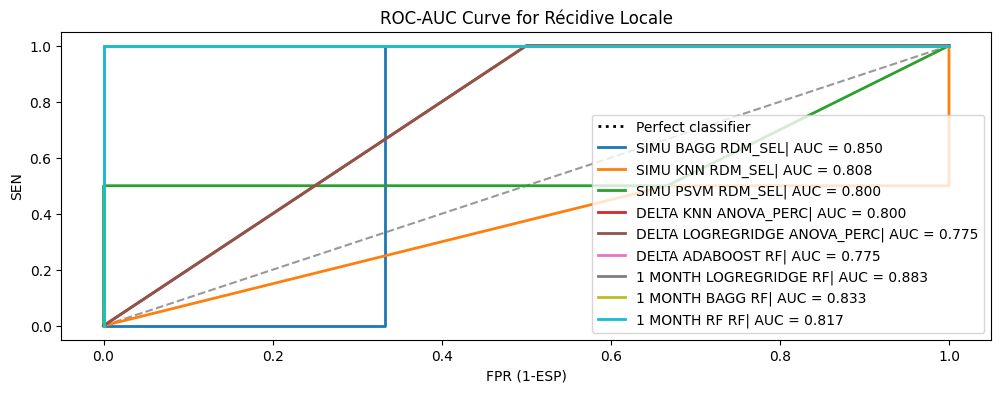

Results saved in json_results/results_ncv_simu_gie_retrain.json file.
--- 3446.278581380844 seconds ---


In [5]:
retrain(top_results, 9)

# GIE/MRIdian comparison on simu

In [2]:
folder_path = '/home/tachennf/Documents/delta-rad/extracted_radiomics/'
delta_rad_tables = ['all_simu_gie_gtv.csv', 'simu_gtv.csv'] # ['rd_f1_f5_gtv.csv'] # 'f3_gtv.csv', 'simu_gtv.csv', 'f1_gtv.csv', 'f5_gtv.csv', 'rd_simu_f1_gtv.csv', 'rd_simu_f3_gtv.csv', 'rd_simu_f5_gtv.csv', 'rd_f1_f3_gtv.csv', 
feat_sel_algo_list = ['ANOVA_PERC', 'RDM_SEL', 'NO_SEL', 'RF']
outcome_csv = 'outcomes.csv'
smote = False
results_file = 'json_results/results_ncv_gie_mridian_comparison.json'
pred_algo_list = ['RF', 'ADABOOST', 'LOGREGRIDGE', 'PSVM', 'KNN',  'BAGG', 'MLP', 'QDA']
MAX_FEATURES = 3
outcomes_list = ['Récidive Locale'] # 'Récidive Méta', 

In [3]:
results_dict = json.load(open(results_file))

print(list(results_dict.keys()))
metric_list = ['roc_auc', 'sensitivity', 'specificity']
results = pd.read_json(results_file)

['all_simu_gie_gtv.csv', 'simu_gtv.csv']


## Best AUCs

In [10]:
top_results = af.get_best_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, 'Récidive Locale', metric='test_auc', k = 10)

Top 10 results for each table and Récidive Locale in terms of test_auc:
Top 10 mean results for table all_simu_gie_gtv.csv:
Mean test_auc: 0.6499999999999999, Prediction Algorithm: LOGREGRIDGE, Feature Selection Algorithm: ANOVA_PERC, Features: ['original_firstorder_90Percentile']
Mean test_auc: 0.6233333333333331, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_PERC, Features: ['original_firstorder_90Percentile', 'original_firstorder_Median']
Mean test_auc: 0.6199999999999997, Prediction Algorithm: PSVM, Feature Selection Algorithm: RDM_SEL, Features: ['original_ngtdm_Coarseness']
Mean test_auc: 0.6166666666666667, Prediction Algorithm: LOGREGRIDGE, Feature Selection Algorithm: RF, Features: ['original_shape_Flatness', 'original_firstorder_Median']
Mean test_auc: 0.6108333333333329, Prediction Algorithm: KNN, Feature Selection Algorithm: RF, Features: ['original_shape_Flatness', 'original_firstorder_Median', 'original_glcm_Correlation']
Mean test_auc: 0.6058333333333332, 

## Boxplots

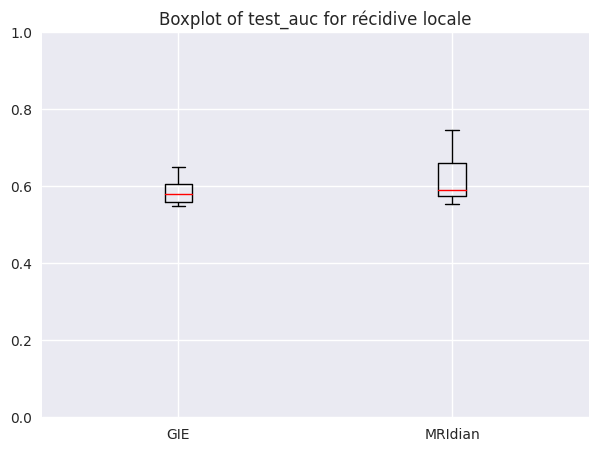

In [7]:
metric_list = ['test_auc']
rec_loc_top_res = af.get_best_results_dict2(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, metric_list, 'Récidive Locale', k=20)
plt.style.use('seaborn-v0_8')
widths = 0.1
medianprops = dict(linestyle='-', linewidth=1, color='red')
nice_tables = ['GIE', 'MRIdian']

plt.figure(figsize=(24, 5))
i = 1
for metric in metric_list: 
    value_by_table = rec_loc_top_res[metric]
    plt.subplot(1, 3, i), plt.boxplot(value_by_table.values(), widths=widths, medianprops=medianprops), plt.title(f'Boxplot of {metric} for récidive locale'), plt.ylim([0, 1]), plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables), 
    i += 1

## Scatter plot

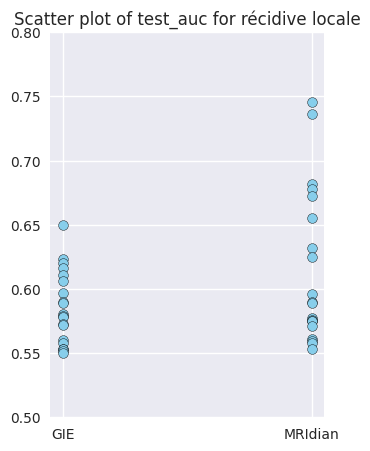

In [9]:
plt.figure(figsize=(12, 5))
i = 1
for metric in metric_list: 
    value_by_table = rec_loc_top_res[metric]
    plt.subplot(1, 3, i)
    for j, table in enumerate(delta_rad_tables):
        data = value_by_table[table]
        x_values = np.full(len(data), j)  # Set x-values for this table (all points at x=j) 
        plt.scatter(x_values, data, color='skyblue', edgecolor='black')
    plt.title(f'Scatter plot of {metric} for récidive locale')
    plt.xticks(range(len(delta_rad_tables)), nice_tables)
    plt.ylim([0.5, 0.8])
    i += 1

## ROC curves

In [ ]:
retrain(top_results, 10)

# SMOTE GIE

In [13]:
folder_path = '/home/tachennf/Documents/delta-rad/extracted_radiomics/'
delta_rad_tables = ['all_simu_gie_gtv.csv', 'simu_gtv.csv'] # ['rd_f1_f5_gtv.csv'] # 'f3_gtv.csv', 'simu_gtv.csv', 'f1_gtv.csv', 'f5_gtv.csv', 'rd_simu_f1_gtv.csv', 'rd_simu_f3_gtv.csv', 'rd_simu_f5_gtv.csv', 'rd_f1_f3_gtv.csv', 
feat_sel_algo_list = ['ANOVA_PERC', 'RDM_SEL', 'NO_SEL', 'RF']
outcome_csv = 'outcomes.csv'
results_file = 'json_results/smote_results_ncv_gie_mridian_comparison.json'
pred_algo_list = ['RF', 'ADABOOST', 'LOGREGRIDGE', 'PSVM', 'KNN',  'BAGG', 'MLP', 'QDA']
outcomes_list = ['Récidive Locale'] # 'Récidive Méta', 

In [14]:
results_dict = json.load(open(results_file))

print(list(results_dict.keys()))
metric_list = ['roc_auc', 'sensitivity', 'specificity']
results = pd.read_json(results_file)

['all_simu_gie_gtv.csv', 'simu_gtv.csv']


In [15]:
top_results = af.get_best_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, 'Récidive Locale', metric='test_auc', k = 5)

Top 5 results for each table and Récidive Locale in terms of test_auc:
Top 5 mean results for table all_simu_gie_gtv.csv:
Mean test_auc: 0.68, Prediction Algorithm: ADABOOST, Feature Selection Algorithm: RDM_SEL, Features: ['original_ngtdm_Coarseness', 'original_shape_MeshVolume']
Mean test_auc: 0.6499999999999999, Prediction Algorithm: LOGREGRIDGE, Feature Selection Algorithm: ANOVA_PERC, Features: ['original_firstorder_90Percentile']
Mean test_auc: 0.6149999999999997, Prediction Algorithm: LOGREGRIDGE, Feature Selection Algorithm: RDM_SEL, Features: ['original_ngtdm_Coarseness', 'original_shape_MeshVolume']
Mean test_auc: 0.6116666666666665, Prediction Algorithm: LOGREGRIDGE, Feature Selection Algorithm: RF, Features: ['original_shape_Flatness', 'original_firstorder_Median']
Mean test_auc: 0.5799999999999996, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_PERC, Features: ['original_firstorder_90Percentile', 'original_firstorder_Median']


Top 5 mean results for table si